In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [26]:
ALPHA=0.2
DPI = 100
FIGSIZE=(14, 9)

In [27]:
# file_path = "C:\\Users\\veljko\\Desktop\\mu-d2"
file_path = "/content/drive/MyDrive/Colab Notebooks/mu-d2"
file_name = "multiclass_data.csv"

In [28]:
data = pd.read_csv(os.path.join(file_path, file_name)).to_numpy()
y = data[:, -1]
X = data[:, 0:5]
labels = np.unique(y)
SEED = 123

In [29]:
# train test split
train_per = 0.8

np.random.seed(SEED)
index = np.random.permutation(y.shape[-1])
X_train = X[index[0:int(train_per*y.shape[-1])]]
y_train = y[index[0:int(train_per*y.shape[-1])]]

X_test = X[index[int(train_per*y.shape[-1])::]]
y_test = y[index[int(train_per*y.shape[-1])::]]

In [30]:
class Logistic_Regresion():

    def __init__(self,
                 learning_rate=1e-5,
                 no_batches=8,
                 no_epoch=100,
                 seed=None):


        self.__learning_rate = learning_rate
        self.__no_batches = no_batches
        self.__epochs = no_epoch
        self.__seed = seed

    def __standardize(self, X):
        self.X_mean = np.mean(X, axis=0)
        self.X_std = np.std(X, axis=0)

    def __transform(self, X):
        Xt = np.empty(shape=X.shape, dtype=float)
        for i in range(X.shape[0]):
            Xt[i, :] = (X[i, :]-self.X_mean)/self.X_std
        return Xt

    def __logistic_function(self, X):
        z = np.sum(X * self.theta)
        return 1/(1 + np.exp(-z))

    def log_likelihood(self, X, y):
        m = X.shape[0]
        l = np.empty(shape=(m, ), dtype=float)
        for i in range(m):
            l[i] = y[i]*np.log(self.__logistic_function(X[i, :])) + \
            (1-y[i])*np.log(1-self.__logistic_function(X[i, :]))
        return np.sum(l)

    def likelihood(self, X, y):
        m = X.shape[0]
        l = np.empty(shape=(m, ), dtype=float)
        for i in range(m):
            l[i] = (self.__logistic_function(X[i, :]))**y[i] + \
            np.log(1-self.__logistic_function(X[i, :]))**(1-y[i])
        return np.sum(l)

    def __calculate_gradient(self, X, y):
        m = X.shape[0]
        n = X.shape[1]

        dl = np.zeros(shape=(n,), dtype=float)
        for j in range(n):
            for i in range(m):
                dl[j] = (y[i] - self.__logistic_function(X[i, :]))*X[i, j]

        return dl

    def __stohastic_gradiend(self, X, y):
        m = X.shape[0]
        batch_size = m//self.__no_batches

        self.training_likelihood = []
        for epoch in range(self.__epochs):
            index = np.random.permutation(y.shape[-1])
            X = X[index, :]
            y = y[index]
            for i in range(self.__no_batches):
                grad_l = self.__calculate_gradient(X[i*batch_size:(i+1)*batch_size, :],
                                                   y[i*batch_size:(i+1)*batch_size])

                self.theta += self.__learning_rate*grad_l

                self.training_likelihood.append(self.likelihood(X[i*batch_size:(i+1)*batch_size, :],
                                                    y[i*batch_size:(i+1)*batch_size]))
                # self.training_likelihood.append(self.likelihood(X,y))

        self.training_likelihood=np.array(self.training_likelihood)

    def fit(self, X, y):
        self.__standardize(X)
        X = self.__transform(X)
        n = X.shape[-1]
        np.random.seed(self.__seed)
        self.theta = np.random.randn(n)
        self.__stohastic_gradiend(X, y)
        return

    def predict(self, X):
        X = (X-self.X_mean)/self.X_std
        return self.__logistic_function(X)

In [31]:
# large learning rate
LEARNING_RATE = 100
NO_BATCHES = 10
NO_EPOCH = 300

In [32]:
# classifier for 1st class
y_train0 = 1*(y_train==labels[0])
classifier0_large_learning_rate = Logistic_Regresion(learning_rate=LEARNING_RATE,
                 no_batches=NO_BATCHES,
                 no_epoch=NO_EPOCH,
                 seed=None)

classifier0_large_learning_rate.fit(X_train, y_train0)

# classifier for 2nd class
y_train1 = 1*(y_train==labels[1])
classifier1_large_learning_rate = Logistic_Regresion(learning_rate=LEARNING_RATE,
                 no_batches=NO_BATCHES,
                 no_epoch=NO_EPOCH,
                 seed=None)

classifier1_large_learning_rate.fit(X_train, y_train1)


# classifier for 3rd class
y_train2 = 1*(y_train==labels[2])
classifier2_large_learning_rate = Logistic_Regresion(learning_rate=LEARNING_RATE,
                 no_batches=NO_BATCHES,
                 no_epoch=NO_EPOCH,
                 seed=None)

classifier2_large_learning_rate.fit(X_train, y_train2)

<ipython-input-30-b5f1dd939321>:42: RuntimeWarning: divide by zero encountered in log
  np.log(1-self.__logistic_function(X[i, :]))**(1-y[i])
<ipython-input-30-b5f1dd939321>:27: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


In [33]:
# small learning rate
LEARNING_RATE = 1e-3

In [34]:
# classifier for 1st class
y_train0 = 1*(y_train==labels[0])
classifier0_small_learning_rate = Logistic_Regresion(learning_rate=LEARNING_RATE,
                 no_batches=NO_BATCHES,
                 no_epoch=NO_EPOCH,
                 seed=None)

classifier0_small_learning_rate.fit(X_train, y_train0)

# classifier for 2nd class
y_train1 = 1*(y_train==labels[1])
classifier1_small_learning_rate = Logistic_Regresion(learning_rate=LEARNING_RATE,
                 no_batches=NO_BATCHES,
                 no_epoch=NO_EPOCH,
                 seed=None)

classifier1_small_learning_rate.fit(X_train, y_train1)


# classifier for 3rd class
y_train2 = 1*(y_train==labels[2])
classifier2_small_learning_rate = Logistic_Regresion(learning_rate=LEARNING_RATE,
                 no_batches=NO_BATCHES,
                 no_epoch=NO_EPOCH,
                 seed=None)

classifier2_small_learning_rate.fit(X_train, y_train2)

In [35]:
# large batch size
LEARNING_RATE = 1e-2
NO_BATCHES = 2

In [36]:
# classifier for 1st class
y_train0 = 1*(y_train==labels[0])
classifier0_large_batch_size = Logistic_Regresion(learning_rate=LEARNING_RATE,
                 no_batches=NO_BATCHES,
                 no_epoch=NO_EPOCH,
                 seed=None)

classifier0_large_batch_size.fit(X_train, y_train0)

# classifier for 2nd class
y_train1 = 1*(y_train==labels[1])
classifier1_large_batch_size = Logistic_Regresion(learning_rate=LEARNING_RATE,
                 no_batches=NO_BATCHES,
                 no_epoch=NO_EPOCH,
                 seed=None)

classifier1_large_batch_size.fit(X_train, y_train1)


# classifier for 3rd class
y_train2 = 1*(y_train==labels[2])
classifier2_large_batch_size = Logistic_Regresion(learning_rate=LEARNING_RATE,
                 no_batches=NO_BATCHES,
                 no_epoch=NO_EPOCH,
                 seed=None)

classifier2_large_batch_size.fit(X_train, y_train2)

In [37]:
# small batch size
NO_BATCHES = 30

In [38]:
# classifier for 1st class
y_train0 = 1*(y_train==labels[0])
classifier0_small_batch_size = Logistic_Regresion(learning_rate=LEARNING_RATE,
                 no_batches=NO_BATCHES,
                 no_epoch=NO_EPOCH,
                 seed=None)

classifier0_small_batch_size.fit(X_train, y_train0)

# classifier for 2nd class
y_train1 = 1*(y_train==labels[1])
classifier1_small_batch_size = Logistic_Regresion(learning_rate=LEARNING_RATE,
                 no_batches=NO_BATCHES,
                 no_epoch=NO_EPOCH,
                 seed=None)

classifier1_small_batch_size.fit(X_train, y_train1)


# classifier for 3rd class
y_train2 = 1*(y_train==labels[2])
classifier2_small_batch_size = Logistic_Regresion(learning_rate=LEARNING_RATE,
                 no_batches=NO_BATCHES,
                 no_epoch=NO_EPOCH,
                 seed=None)

classifier2_small_batch_size.fit(X_train, y_train2)

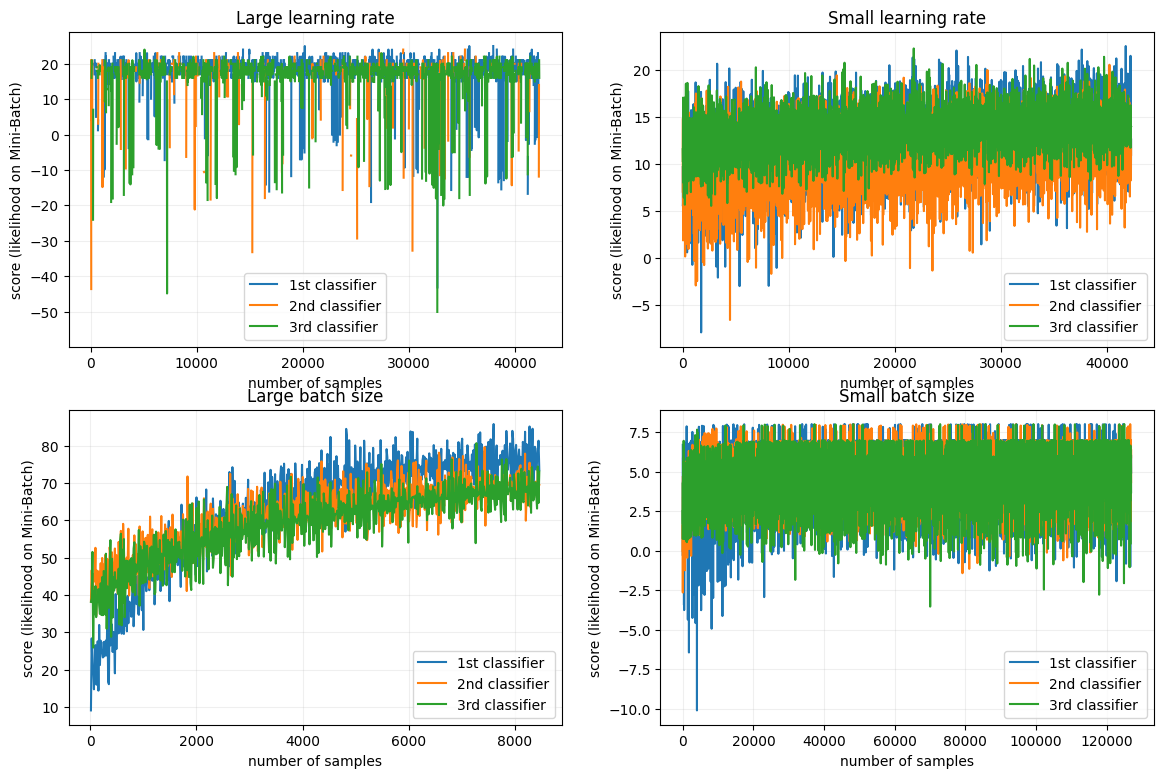

In [39]:
plt.figure(figsize=FIGSIZE, dpi=DPI)

no_samples = np.arange(classifier0_large_learning_rate.training_likelihood.shape[-1]) + 1
no_samples = no_samples*(y_train.shape[-1]/10)
plt.subplot(221)
plt.plot(no_samples, classifier0_large_learning_rate .training_likelihood,
         label="1st classifier")
plt.plot(no_samples, classifier1_large_learning_rate .training_likelihood,
         label="2nd classifier")
plt.plot(no_samples, classifier2_large_learning_rate .training_likelihood,
         label="3rd classifier")
plt.legend()
plt.title("Large learning rate")
plt.ylabel("score (likelihood on Mini-Batch)")
plt.xlabel("number of samples")
plt.grid(alpha=ALPHA)

no_samples = np.arange(classifier0_small_learning_rate.training_likelihood.shape[-1]) + 1
no_samples = no_samples*(y_train.shape[-1]/10)
plt.subplot(222)
plt.plot(no_samples, classifier0_small_learning_rate.training_likelihood,
         label="1st classifier")
plt.plot(no_samples, classifier1_small_learning_rate.training_likelihood,
         label="2nd classifier")
plt.plot(no_samples, classifier2_small_learning_rate.training_likelihood,
         label="3rd classifier")
plt.legend()
plt.title("Small learning rate")
plt.ylabel("score (likelihood on Mini-Batch)")
plt.xlabel("number of samples")
plt.grid(alpha=ALPHA)


no_samples = np.arange(classifier0_large_batch_size.training_likelihood.shape[-1]) + 1
no_samples = no_samples*(y_train.shape[-1]/10)
plt.subplot(223)
plt.plot(no_samples, classifier0_large_batch_size.training_likelihood,
         label="1st classifier")
plt.plot(no_samples, classifier1_large_batch_size.training_likelihood,
         label="2nd classifier")
plt.plot(no_samples, classifier2_large_batch_size.training_likelihood,
         label="3rd classifier")
plt.legend()
plt.title("Large batch size")
plt.ylabel("score (likelihood on Mini-Batch)")
plt.xlabel("number of samples")
plt.grid(alpha=ALPHA)

no_samples = np.arange(classifier0_small_batch_size.training_likelihood.shape[-1]) + 1
no_samples = no_samples*(y_train.shape[-1]/10)
plt.subplot(224)
plt.plot(no_samples, classifier0_small_batch_size.training_likelihood,
         label="1st classifier")
plt.plot(no_samples, classifier1_small_batch_size.training_likelihood,
         label="2nd classifier")
plt.plot(no_samples, classifier2_small_batch_size.training_likelihood,
         label="3rd classifier")
plt.legend()
plt.title("Small batch size")
plt.ylabel("score (likelihood on Mini-Batch)")
plt.xlabel("number of samples")
plt.grid(alpha=ALPHA)

In [40]:
LEARNING_RATE = 1e-2
NO_BATCHES = 10
NO_EPOCH = 300

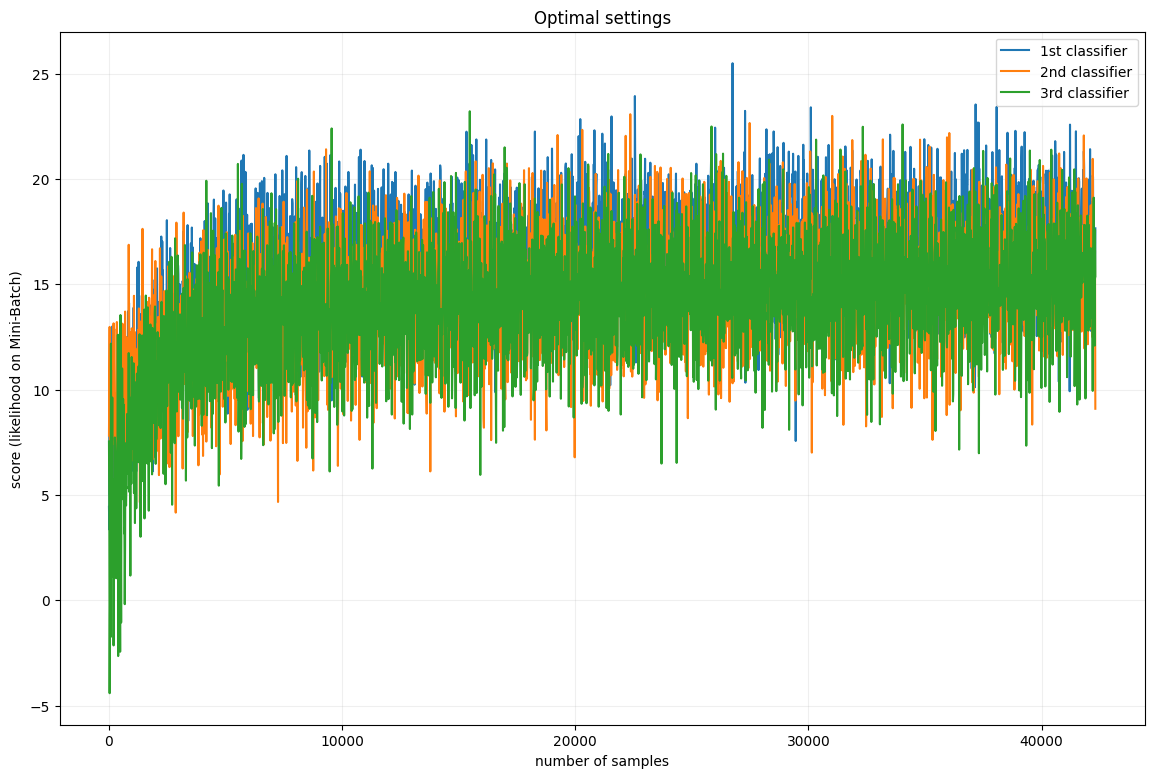

In [41]:
# classifier for 1st class
y_train0 = 1*(y_train==labels[0])
classifier0 = Logistic_Regresion(learning_rate=LEARNING_RATE,
                 no_batches=NO_BATCHES,
                 no_epoch=NO_EPOCH,
                 seed=None)

classifier0.fit(X_train, y_train0)

# classifier for 2nd class
y_train1 = 1*(y_train==labels[1])
classifier1 = Logistic_Regresion(learning_rate=LEARNING_RATE,
                 no_batches=NO_BATCHES,
                 no_epoch=NO_EPOCH,
                 seed=None)

classifier1.fit(X_train, y_train1)


# classifier for 3rd class
y_train2 = 1*(y_train==labels[2])
classifier2 = Logistic_Regresion(learning_rate=LEARNING_RATE,
                 no_batches=NO_BATCHES,
                 no_epoch=NO_EPOCH,
                 seed=None)

classifier2.fit(X_train, y_train2)

no_samples = np.arange(classifier0.training_likelihood.shape[-1]) + 1
no_samples = no_samples*(y_train.shape[-1]/10)
plt.figure(figsize=FIGSIZE, dpi=DPI)
plt.plot(no_samples, classifier0.training_likelihood, label="1st classifier")
plt.plot(no_samples, classifier1.training_likelihood, label="2nd classifier")
plt.plot(no_samples, classifier2.training_likelihood, label="3rd classifier")
plt.legend()
plt.title("Optimal settings")
plt.ylabel("score (likelihood on Mini-Batch)")
plt.xlabel("number of samples")
plt.grid(alpha=ALPHA)

Training accuracy: 
0.950354609929078
0.04964539007092199


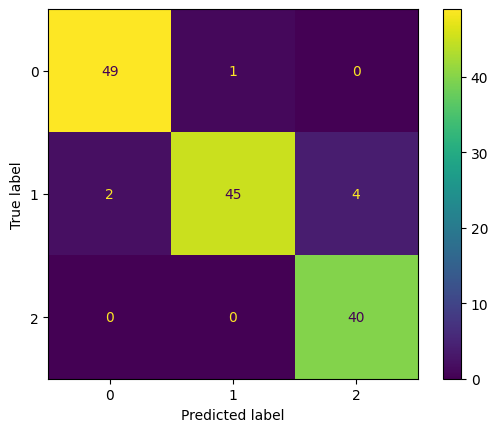

In [42]:
# accuracy on train set
y_pred = np.empty(shape=y_train.shape[-1], dtype=float)
scores = np.empty(shape=labels.shape[-1], dtype=float)
for i in range(y_train.shape[-1]):
    scores[0] = classifier0.predict(X_train[i, :])
    scores[1] = classifier1.predict(X_train[i, :])
    scores[2] = classifier2.predict(X_train[i, :])
    y_pred[i] = np.argmax(scores)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
print("Training accuracy: ")
print(np.sum(y_pred==y_train)/y_train.shape[-1])
print(np.sum(y_pred!=y_train)/y_train.shape[-1])

Test accuracy: 
1.0
0.0


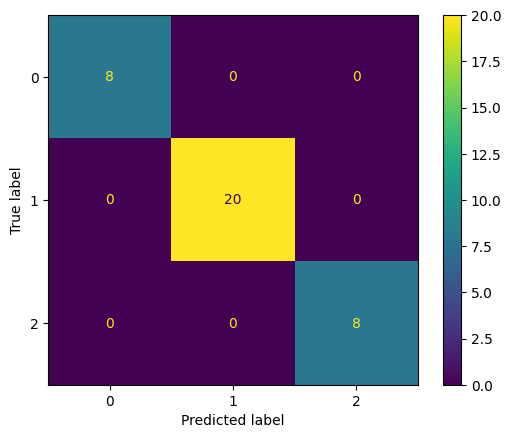

In [43]:
# accuracy on test set
y_pred = np.empty(shape=y_test.shape[-1], dtype=float)
scores = np.empty(shape=labels.shape[-1], dtype=float)
for i in range(y_test.shape[-1]):
    scores[0] = classifier0.predict(X_test[i, :])
    scores[1] = classifier1.predict(X_test[i, :])
    scores[2] = classifier2.predict(X_test[i, :])
    y_pred[i] = np.argmax(scores)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
print("Test accuracy: ")
print(np.sum(y_pred==y_test)/y_test.shape[-1])
print(np.sum(y_pred!=y_test)/y_test.shape[-1])

In [44]:
class Gaussian_Discriminant_Analisys():
    def __calculate_scores(self, X):
        scores = np.empty(shape=(self.__no_classes,))

        for i in range(self.__no_classes):
            scores[i] = np.exp(-0.5*(X-self.X_mean[i, :]).T @
                               np.linalg.inv(self.X_cov[:, :, i]) @ (X-self.X_mean[i, :]))
            scores[i] /= np.sqrt((2*np.pi)**(X.shape[-1])*
                                 np.linalg.det(self.X_cov[:, :, i]))
            scores[i] *= self.probability[i]

        return scores



    def fit(self, X, y):
        m = y.shape[-1]
        self.__labels = np.unique(y)
        self.__no_classes = len(self.__labels)

        self.X_mean = np.empty(shape=(self.__no_classes, X.shape[-1]),
                               dtype=float)
        self.X_cov = np.empty(shape=(X.shape[-1], X.shape[-1], self.__no_classes),
                              dtype=float)
        self.probability = np.empty(shape=(self.__no_classes,), dtype=float)

        for i in range(self.__no_classes):
            self.X_mean[i, :] = np.mean(X[y==self.__labels[i], :], axis=0)
            self.X_cov[:, :, i] = np.cov(X[y==self.__labels[i], :], rowvar=False)
            self.probability[i] = np.sum(y==self.__labels[i])/m
            # print(self.probability[i])

        return

    def predict(self, X):
        return np.argmax(self.__calculate_scores(X))


Training accuracy: 
0.9858156028368794
0.014184397163120567


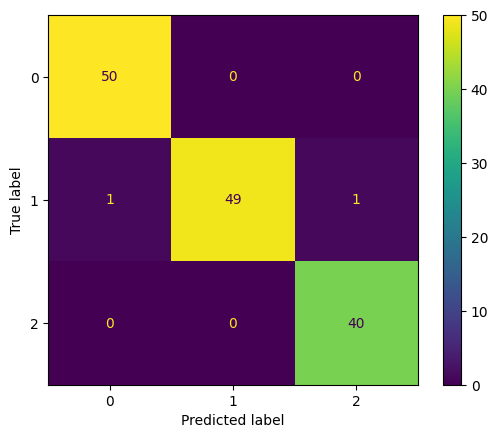

In [45]:
# B4 = 6, parno -> Gausova diskriminanta analiza (GDA)

gda = Gaussian_Discriminant_Analisys()
gda.fit(X_train, y_train)

y_pred = np.empty(shape=y_train.shape, dtype=float)
for i in range(y_train.shape[-1]):
    y_pred[i] = gda.predict(X_train[i, :])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
print("Training accuracy: ")
print(np.sum(y_pred==y_train)/y_train.shape[-1])
print(np.sum(y_pred!=y_train)/y_train.shape[-1])

Test accuracy: 
0.4166666666666667
0.5833333333333334


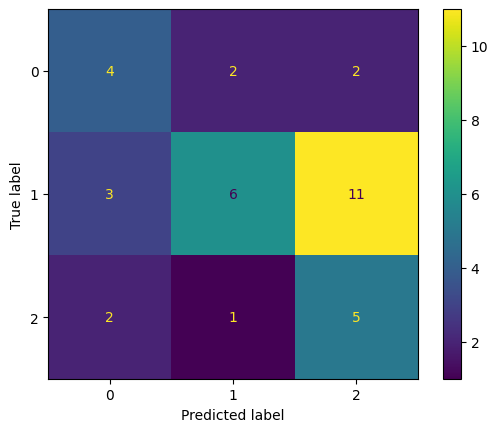

In [46]:
# accuracy on test set
y_pred = np.empty(shape=y_test.shape[-1], dtype=float)
scores = np.empty(shape=labels.shape[-1], dtype=float)
for i in range(y_test.shape[-1]):
  y_pred[i] = gda.predict(X_train[i, :])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
print("Test accuracy: ")
print(np.sum(y_pred==y_test)/y_test.shape[-1])
print(np.sum(y_pred!=y_test)/y_test.shape[-1])